In [1]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn
from sklearn import linear_model
import numpy as np
import pickle

In [2]:
client = MongoClient('127.0.0.1', 3001)
db = client.meteor
images = list(db.facebook.find({}))

In [3]:
df = pd.DataFrame(images)
df = df.dropna(subset = ['normalized_log_likes'])
# drop data with missing username
df = df[df['user'] != 'profile.php']
df = df.set_index(pd.TimeSeries(df.timestamp))

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: TimeSeries is deprecated. Please use Series


In [4]:
likes = np.zeros((len(df), 1))
responses = np.zeros((len(df), 2048))
categories = np.zeros((len(df), 1008))
facedata = np.zeros((len(df), 3))

for i in range(len(df)):
    likes[i, :] = df['normalized_log_likes'][i]
    responses[i, :] = df['inception_pool'][i]
    categories[i, :] = df['inception_classification'][i]

In [5]:
users = set(df['user'])
users = list(users)
user_hot = np.zeros((len(df), len(users)-1))

for i in range(len(df)):
    user_index = users.index(df['user'][i])
    if (user_index) > 0:
        user_hot[i, user_index-1] = 1

In [8]:
# choose 100 random users to be the test set
test_users = np.random.choice(len(users)-1, 100) + 1
test_set = np.any(user_hot[:, test_users - 1], axis = 1)
training_set = np.logical_not(test_set)
training_responses = np.hstack((responses[training_set, :],user_hot[training_set, :]))
training_likes = likes[training_set]

In [9]:
test_responses = np.hstack((responses[test_set, :],0*user_hot[test_set, :]))
test_likes = likes[test_set]

In [10]:
clf = linear_model.LinearRegression()
clf.fit(training_responses, training_likes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

0.060768283982,0.920875800053
-3.4475916762,1.0
0.0398432170231,0.0634261685215
0.222837447745,0.999840133695
0.0,1.0
2.43204912247,1.0
0.0566940126459,0.073433394447
-0.039628743626,0.00935119791437
0.167209052283,0.296539686704
-0.701239761197,1.0
-0.015033845228,1.0
-0.0978084598071,0.999976617272
0.00338641753963,9.35041592209e-05
-0.0235158319633,0.00708476804319
0.316682790699,0.926473333807
0.0719509127115,0.247649337067
-0.0227274018568,1.0
0.0230491094194,0.00488234885421
0.165983032954,0.426458012552
0.0827225854941,0.0793428652397
-0.261800174623,1.0
-0.505274753231,1.0
-0.784988552206,1.0
0.114105796189,1.0
-0.126621560016,1.0
-80658.5787978,1.0
-0.0791230044157,0.239325465003
0.0485022068619,1.0
-0.041710061069,1.0
0.0,0.0
0.0905361749845,0.100773693844
0.209114833461,1.0
0.435944188375,0.502583755176
-0.0823840444168,1.0
-0.0425212315551,1.0
-0.60719865582,1.0
-0.108174645276,1.0
0.0203998863771,0.0105124322909
0.0960064208295,0.0872730744707
0.142547251409,0.168299482017

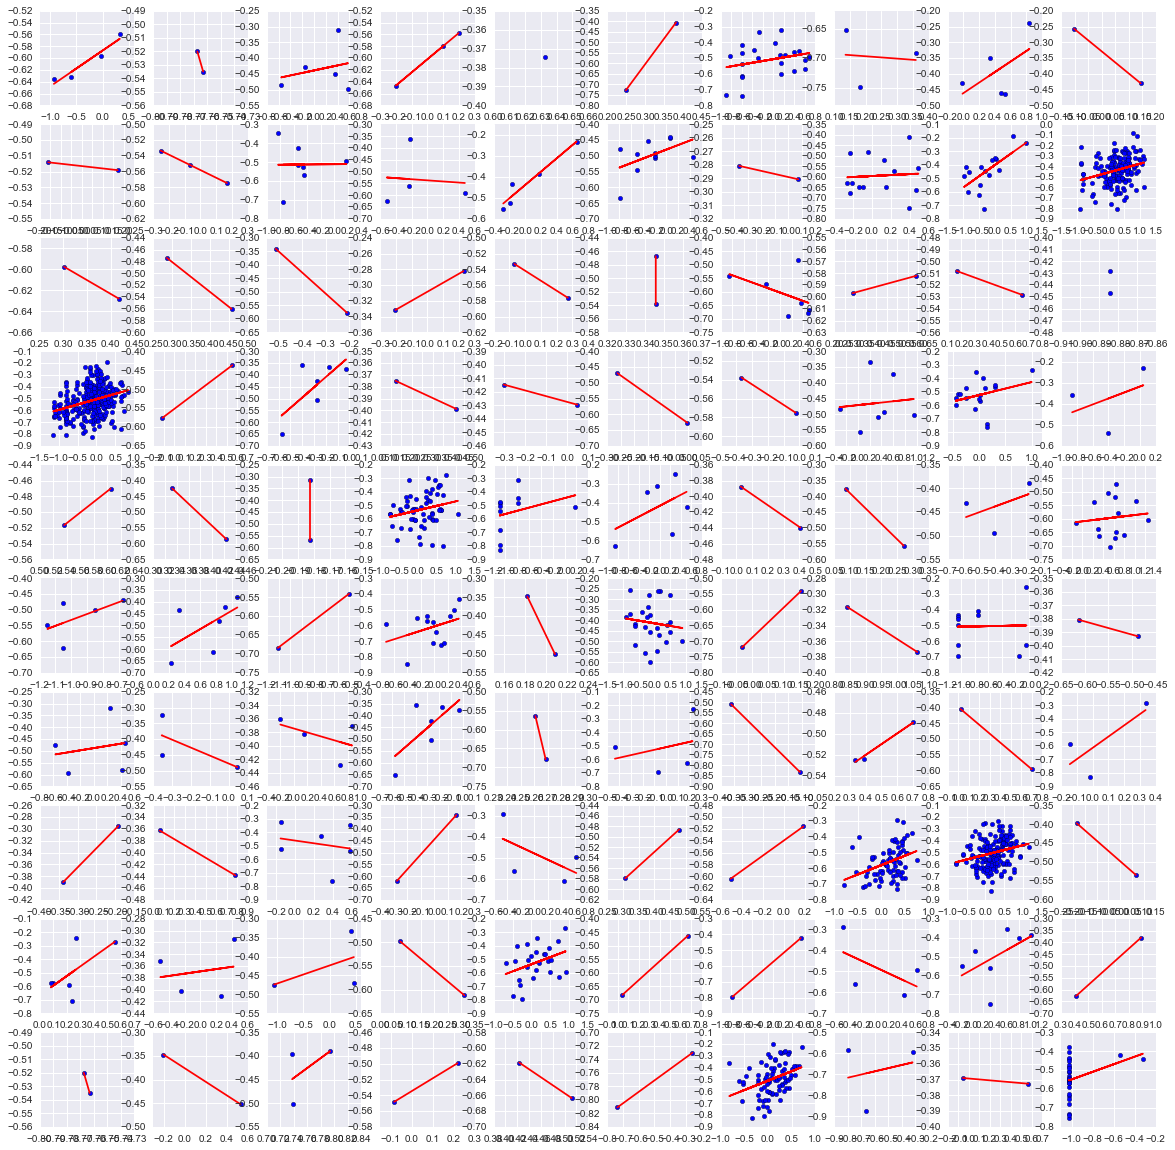

In [19]:
plt.figure(figsize=(20,20))
subp = 1

for u in test_users:
    subtest_set = np.hstack((responses[user_hot[:, u-1] == 1, :], 0*user_hot[user_hot[:, u-1] == 1, :]))
    subtest_likes = likes[user_hot[:, u-1] == 1]
    pred_likes = clf.predict(subtest_set)
    verify_fit = linear_model.LinearRegression()
    verify_fit.fit(subtest_likes, pred_likes)
    
    print(str(verify_fit.coef_[0][0]) + "," + str(verify_fit.score(subtest_likes, pred_likes)))
    
    plt.subplot(10, 10, subp)
    subp += 1
    plt.scatter(subtest_likes, pred_likes)
    plt.plot(subtest_likes, subtest_likes * verify_fit.coef_ + verify_fit.intercept_, color = 'red')

In [20]:
coefs = [0.060768283982    ,-3.4475916762     ,0.0398432170231   ,0.222837447745    ,0.0     ,2.43204912247     ,0.0566940126459   ,-0.039628743626   ,0.167209052283    ,-0.701239761197   ,-0.015033845228   ,-0.0978084598071  ,0.00338641753963  ,-0.0235158319633  ,0.316682790699    ,0.0719509127115   ,-0.0227274018568  ,0.0230491094194   ,0.165983032954    ,0.0827225854941   ,-0.261800174623   ,-0.505274753231   ,-0.784988552206   ,0.114105796189    ,-0.126621560016   ,-80658.5787978    ,-0.0791230044157  ,0.0485022068619   ,-0.041710061069   ,0.0  ,0.0905361749845   ,0.209114833461    ,0.435944188375    ,-0.0823840444168  ,-0.0425212315551  ,-0.60719865582    ,-0.108174645276   ,0.0203998863771   ,0.0960064208295   ,0.142547251409    ,0.673618247361    ,-1.75801501878    ,-65530050.7004    ,0.0659869629092   ,0.117304604533    ,0.144777260442    ,-0.137819875097   ,-0.978606055209   ,0.122140976318    ,0.0235166491306   ,0.186793135174    ,0.194758306159    ,0.237598557832    ,0.136746764381    ,-5.77946626381    ,-0.0253084076722  ,0.953748753732    ,-0.25744357092    ,0.00762995032501  ,-0.0978342968096  ,0.0468376760018   ,-0.252829287386   ,-0.0292100892517  ,0.435944188375    ,-15.0336946055    ,0.197546806277    ,-1.26606446761    ,0.102283573112    ,-0.282072220371   ,0.83296760199     ,0.651437910537    ,-0.105353093729   ,-0.101113043966   ,0.63391495062     ,-0.149716775853   ,0.543388520672    ,0.12780992484     ,0.119378909467    ,0.081297140933    ,-0.54648141993    ,0.713006684759    ,0.0192746253275   ,0.0478673412313   ,-0.480016292219   ,0.106071967056    ,0.351262976735    ,0.285772104489    ,-0.149716775853   ,0.176362737268    ,0.512911738768    ,-3.4475916762     ,-0.143329670074   ,1.05080290485     ,0.162509074297    ,-0.506816559133   ,0.169776680919    ,0.159272064941    ,0.151511061996    ,-0.00584310025224 ,0.200418671134]

(array([ 0.,  0.,  1.,  3.,  0.,  0.,  5.,  6.,  3.,  7.,  8.,  8.,  8.,
         8.,  8.,  4.,  0.,  2.,  1.,  0.]),
 array([-0.4    , -0.36005, -0.3201 , -0.28015, -0.2402 , -0.20025,
        -0.1603 , -0.12035, -0.0804 , -0.04045, -0.0005 ,  0.03945,
         0.0794 ,  0.11935,  0.1593 ,  0.19925,  0.2392 ,  0.27915,
         0.3191 ,  0.35905,  0.399  ]),
 <a list of 20 Patch objects>)

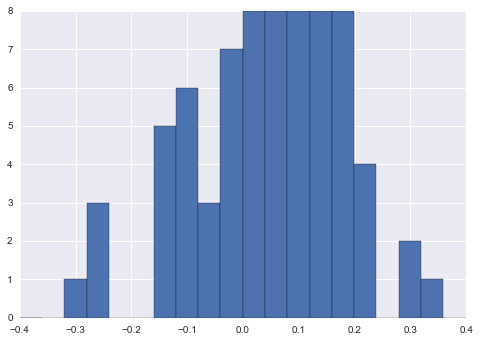

In [27]:
plt.hist(coefs, np.linspace(-.4, .399, 21))

In [ ]:
test_set

In [125]:
facedata[:,0] = [v['num'] for v in df['faces']]
facedata[:,1] = [v['total'] for v in df['faces']]
facedata[:,2] = [v['largest'] for v in df['faces']]

In [14]:
clf = svm.SVR(verbose=True)

In [7]:
loglikes = np.log10(likes+1)

In [28]:
clf.fit(responses[:40000,:], loglikes[:40000])

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [25]:
likes.shape

(85904,)

In [127]:
from sklearn import linear_model

In [128]:
clf = linear_model.LinearRegression()

In [158]:
likes[:70000]

array([[-0.30255102],
       [ 0.76478237],
       [ 0.62983823],
       ..., 
       [-0.15953492],
       [-0.15905263],
       [-0.22505521]])

In [ ]:
clf.fit(facedata[:70000,0], np.transpose(likes[:70000]))

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [ ]:
pred_likes = clf.predict(facedata[70000:74000,0])

In [ ]:
plt.scatter(likes[70000:74000], pred_likes)
# plt.ylim([-40, 100])

In [153]:
clf.score(responses[70000:74000,:], likes[70000:740000])

-0.015877338102834759

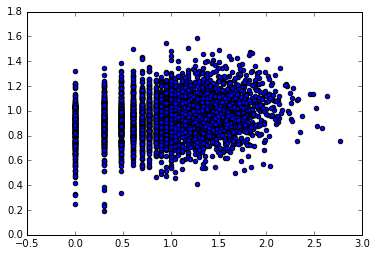

In [29]:
pred_likes = clf.predict(responses[80000:84000])
plt.scatter(loglikes[80000:84000], pred_likes)
# plt.ylim([-40, 100])

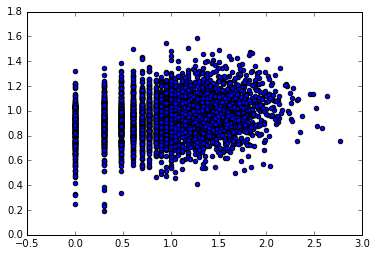

In [30]:
pred_likes = clf.predict(responses[80000:84000])
plt.scatter(loglikes[80000:84000], pred_likes)
# plt.ylim([-40, 100])